In [98]:
# 1. Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv("emissions_by_country.csv")

In [100]:
df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750.0,0.0,70,55455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751.0,0.0,66,45101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752.0,0.0,72,31891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753.0,0.0,44,35466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754.0,0.0,21,33247,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
df.shape

(63104, 13)

In [102]:
df.dtypes

Country                  object
ISO 3166-1 alpha-3       object
Year                    float64
Total                   float64
Temperature               int64
GDP Per Capita (USD)      int64
Coal                    float64
Oil                     float64
Gas                     float64
Cement                  float64
Flaring                 float64
Other                   float64
Per Capita              float64
dtype: object

In [103]:
df.describe()

,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,62307.000000,62381.000000,63104.000000,63104.000000,21797.000000,21774.000000,21717.000000,20488.000000,21338.000000,2685.000000,19392.000000
mean,1888.267097,73.683456,49.497813,39026.539015,127.387271,153.480038,125.162671,62.599364,56.074327,849.395127,121.565443
std,122.651184,843.930381,17.292092,10975.539432,677.951392,670.830891,514.391435,353.918064,337.629062,1055.250022,489.339877
min,1003.000000,0.000000,20.000000,20000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1816.000000,0.000000,35.000000,29498.750000,0.000000,0.113584,0.000000,0.000000,0.000000,1.016000,0.231702
50%,1886.000000,0.000000,49.000000,39067.000000,0.344416,1.344688,0.000000,0.032709,0.000000,9.237945,1.601436
75%,1955.000000,0.659520,64.000000,48544.250000,8.500480,13.008908,1.683510,0.725079,0.000000,1812.000000,6.305100
max,2999.000000,37123.850352,79.000000,57999.000000,15051.512770,12345.653374,7921.829472,2982.000000,2994.000000,2999.000000,2997.000000


In [104]:
# Looks like there are many NaN values. Taking a look by column

In [105]:
for col in df.columns:
    print(f"Col: {col}; NaN count: {df[col].isna().sum()}; Percentage NaN: {100 * (df[col].isna().sum()/df.shape[0])}")

Col: Country; NaN count: 2017; Percentage NaN: 3.196310851926978
Col: ISO 3166-1 alpha-3; NaN count: 3621; Percentage NaN: 5.738146551724138
Col: Year; NaN count: 797; Percentage NaN: 1.2629944219066938
Col: Total; NaN count: 723; Percentage NaN: 1.1457276876267748
Col: Temperature; NaN count: 0; Percentage NaN: 0.0
Col: GDP Per Capita (USD); NaN count: 0; Percentage NaN: 0.0
Col: Coal; NaN count: 41307; Percentage NaN: 65.45860801217039
Col: Oil; NaN count: 41330; Percentage NaN: 65.49505578093306
Col: Gas; NaN count: 41387; Percentage NaN: 65.58538286004057
Col: Cement; NaN count: 42616; Percentage NaN: 67.53296146044624
Col: Flaring; NaN count: 41766; Percentage NaN: 66.18597870182555
Col: Other; NaN count: 60419; Percentage NaN: 95.745119168357
Col: Per Capita; NaN count: 43712; Percentage NaN: 69.26977687626776


In [106]:
# A lot of columns have more than 65% missing values. It doesn't make sense to impute them. 
# Hence, dropping those columns.

In [107]:
df.drop(columns = ["Coal", "Oil", "Gas", "Cement", "Flaring", "Other", "Per Capita"], inplace = True)

In [108]:
df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Temperature,GDP Per Capita (USD)
0,Afghanistan,AFG,1750.0,0.0,70,55455
1,Afghanistan,AFG,1751.0,0.0,66,45101
2,Afghanistan,AFG,1752.0,0.0,72,31891
3,Afghanistan,AFG,1753.0,0.0,44,35466
4,Afghanistan,AFG,1754.0,0.0,21,33247


In [109]:
for col in df.columns:
    print(f"Col: {col}; NaN count: {df[col].isna().sum()}; Percentage NaN: {100 * (df[col].isna().sum()/df.shape[0])}")
df.isnull().values.ravel().sum()

Col: Country; NaN count: 2017; Percentage NaN: 3.196310851926978
Col: ISO 3166-1 alpha-3; NaN count: 3621; Percentage NaN: 5.738146551724138
Col: Year; NaN count: 797; Percentage NaN: 1.2629944219066938
Col: Total; NaN count: 723; Percentage NaN: 1.1457276876267748
Col: Temperature; NaN count: 0; Percentage NaN: 0.0
Col: GDP Per Capita (USD); NaN count: 0; Percentage NaN: 0.0


7158

In [110]:
# As only a few rows in terms of the whole dataset have NaN. Let's drop the rows with NaN values

In [111]:
df.dropna(inplace = True)

In [112]:
df.shape

(57525, 6)

In [113]:
# 5. Handle mismatched string formats

In [114]:
df.Country.value_counts()

Haiti         264
Angola        262
Bahrain       262
Kazakhstan    262
Portugal      261
             ... 
oman            1
VANUATU         1
GRENADA         1
AZERBAIJAN      1
bahrain         1
Name: Country, Length: 529, dtype: int64

In [115]:
# It is clear that some are upper case, lower case and capitalized etc. 
# To make it consistent, we make everything lower case

In [116]:
# Country

In [117]:
df.Country = df.Country.apply(lambda x : x.lower())

In [118]:
df.Country.value_counts()

kazakhstan                 264
haiti                      264
bahrain                    263
angola                     263
tajikistan                 262
                          ... 
mozambique                 246
fiji                       246
lesotho                    245
papua new guinea           245
international transport     73
Name: Country, Length: 226, dtype: int64

In [119]:
# ISO

In [120]:
df["ISO 3166-1 alpha-3"].value_counts()

KNA    502
HTI    262
AGO    261
MAR    260
KAZ    260
      ... 
gha      1
esp      1
per      1
isl      1
irl      1
Name: ISO 3166-1 alpha-3, Length: 438, dtype: int64

In [121]:
# Similarly, these are not consistent

In [122]:
df["ISO 3166-1 alpha-3"] = df["ISO 3166-1 alpha-3"].apply(lambda x : x.lower())

In [123]:
df["ISO 3166-1 alpha-3"].value_counts()

kna    508
hti    264
kaz    264
bhr    263
ago    263
      ... 
fji    246
ind    246
lso    245
png    245
xit     73
Name: ISO 3166-1 alpha-3, Length: 225, dtype: int64

In [124]:
df.Year = df.Year.astype("Int64")

In [125]:
df_replaced = df.copy()

In [126]:

col = "Total"
mean = df_replaced.Total.mean()
quart_1, quart_3 = df_replaced[col].quantile(0.25), df_replaced[col].quantile(0.75)

inter_quart_range = quart_3 - quart_1 # https://en.wikipedia.org/wiki/Interquartile_range

lower_bound = quart_1 - 1.5 * inter_quart_range # Lower bound of the accepted values
upper_bound = quart_3 + 1.5 * inter_quart_range # Upper bound of the accepted values
df_replaced.Total = df_replaced.Total.apply(lambda x : mean if (x < lower_bound or x > upper_bound) else x)

In [127]:
col = "Year"
mode = df_replaced.Year.mode()[0]
quart_1, quart_3 = df_replaced[col].quantile(0.25), df_replaced[col].quantile(0.75)

inter_quart_range = quart_3 - quart_1 # https://en.wikipedia.org/wiki/Interquartile_range

lower_bound = quart_1 - 1.5 * inter_quart_range # Lower bound of the accepted values
upper_bound = quart_3 + 1.5 * inter_quart_range # Upper bound of the accepted values
df_replaced.Year = df_replaced.Year.apply(lambda x : mode if (x < lower_bound or x > upper_bound) else x)

In [128]:
import seaborn as sns

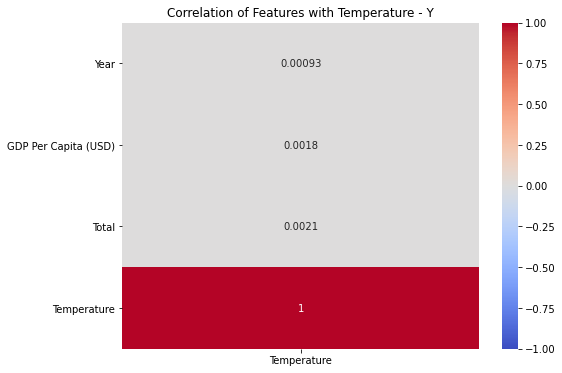

In [129]:
target_corr = df_replaced.corr()[["Temperature"]].sort_values(by = "Temperature")
plt.figure(figsize=(8, 6))
sns.heatmap(target_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation of Features with Temperature - Y")
plt.show()

In [130]:
df_replaced.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Temperature,GDP Per Capita (USD)
0,afghanistan,afg,1750,0.0,70,55455
1,afghanistan,afg,1751,0.0,66,45101
2,afghanistan,afg,1752,0.0,72,31891
3,afghanistan,afg,1753,0.0,44,35466
4,afghanistan,afg,1754,0.0,21,33247


In [131]:
X = df_replaced[["Year", "Total", "GDP Per Capita (USD)"]]

In [132]:
Y = df_replaced[["Temperature"]]

In [133]:
X = X.values
Y = Y.values.reshape(-1, 1)

In [134]:
print("Created Matrices: ")
print("X : \n", X)
print("Y: \n", Y)

Created Matrices: 
X : 
 [[ 1750.             0.         55455.        ]
 [ 1751.             0.         45101.        ]
 [ 1752.             0.         31891.        ]
 ...
 [ 2019.            63.68150178 52918.        ]
 [ 2020.            63.68150178 39808.        ]
 [ 2021.            63.68150178 57602.        ]]
Y: 
 [[70]
 [66]
 [72]
 ...
 [78]
 [34]
 [36]]


In [135]:
# Splitting the dataset into training (80%) and testing (20%)

In [136]:
split = int(len(X) * 0.8)
split

46020

In [137]:
X_train, X_test = X[:split], X[split:]
y_train, y_test = Y[:split], Y[split:]

In [138]:
# Print the shapes of X_train, y_train, X_test, y_test

In [139]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (46020, 3)
Shape of y_train: (46020, 1)
Shape of X_test: (11505, 3)
Shape of y_test: (11505, 1)


In [140]:
# Normalizing features

In [141]:
max_X_train = np.amax(X_train)
min_X_train = np.amin(X_train)

max_X_test = np.amax(X_test)
min_X_test = np.amin(X_test)

In [142]:
(X_train - min_X_train) / (max_X_train - min_X_train)

array([[0.03017293, 0.        , 0.95613717],
       [0.03019018, 0.        , 0.77761686],
       [0.03020742, 0.        , 0.54985431],
       ...,
       [0.03151778, 0.        , 0.45828376],
       [0.03153503, 0.        , 0.49919826],
       [0.03155227, 0.        , 0.71647787]])

In [143]:
X_train = (X_train - min_X_train) / (max_X_train - min_X_train)

In [144]:
X_test = (X_test - min_X_test) / (max_X_test - min_X_test)

In [145]:
max_y_train = np.amax(y_train)
min_y_train = np.amin(y_train)

max_y_test = np.amax(y_test)
min_y_test = np.amin(y_test)

In [146]:
y_train = (y_train - min_y_train) / (max_y_train - min_y_train)
y_test = (y_test - min_y_test) / (max_y_test - min_y_test)

In [147]:
def compute_loss(X, y, w, lambda1, lambda2):

    N = len(y)

    y_pred = X @ w
    

    mse = (1 / (2 * N)) * np.sum((y - y_pred) ** 2)
    

    l2_penalty = (lambda1 / 2) * np.sum(w ** 2)
    

    l1_penalty = lambda2 * np.sum(np.abs(w))
    

    loss = mse + l2_penalty + l1_penalty
    
    return loss

In [148]:
def gradient_descent(l1, l2, weights, X, y, alpha, max_iterations, threshold):
    loss_track = []
    for iter_count in range(max_iterations):
        y_pred = X @ weights
        
        grad = -(1/N) * (X.T @ (y - y_pred)) + l1*weights + l2*np.sign(w)
        
        weights -= alpha  * grad
        
        loss = compute_loss(X, y, weights, l1, l2)
        loss_track.append(loss)
        
        if np.linalg.norm(grad) < threshold:
            print(f"Converged - {iter_count} iteration")
            return weights
        
    return weights, loss_track

In [149]:
lambda1 = 0.4  
lambda2 = 0.8  
alpha = 0.5
max_iterations = 200000
threshold = 0.05

# Random weight initialization
N, d = X.shape
w = np.random.randn(d, 1)


weights, loss_rand = gradient_descent(lambda1, lambda2, w, X_train, y_train, alpha, max_iterations, threshold)

y_test_pred = X_test @ weights

# Mean Squared Error
mse_test = np.mean((y_test - y_test_pred) ** 2)
print(f"Test MSE: {mse_test}")


Test MSE: 0.309005030160349


In [150]:
random_result_weights = weights

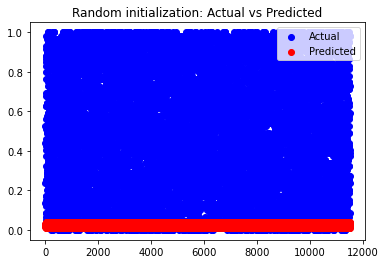

In [151]:

plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(np.arange(len(y_test)), y_test_pred, color='red', label='Predicted')
plt.legend()
plt.title('Random initialization: Actual vs Predicted')
plt.show()


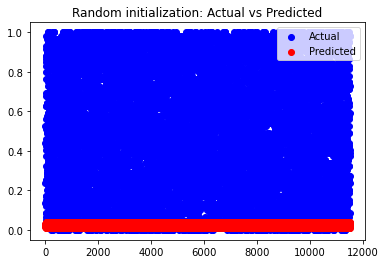

In [152]:

plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(np.arange(len(y_test)), y_test_pred, color='red', label='Predicted')
plt.legend()
plt.title('Random initialization: Actual vs Predicted')
plt.show()


In [153]:
# Zeros initilaization

w = np.zeros((d, 1))

In [154]:
lambda1 = 0.4  
lambda2 = 0.8  
alpha = 0.5
max_iterations = 200000
threshold = 0.07


weights, loss_zero = gradient_descent(lambda1, lambda2, w, X_train, y_train, alpha, max_iterations, threshold)


y_test_pred = X_test @ weights


mse_test = np.mean((y_test - y_test_pred) ** 2)
print(f"Test MSE: {mse_test}")


Test MSE: 0.11994524286022268


In [155]:
zero_result_weights = weights

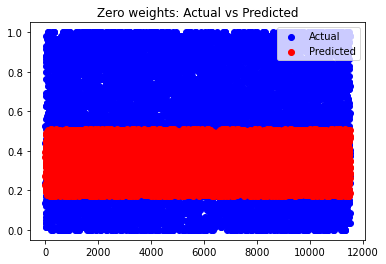

In [156]:
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(np.arange(len(y_test)), y_test_pred, color='red', label='Predicted')
plt.legend()
plt.title('Zero weights: Actual vs Predicted')
plt.show()


In [157]:
# Xavier initialization

In [158]:
def xavier_initialization(input_dim, output_dim):
    limit = np.sqrt(6 / (input_dim + output_dim))
    return np.random.uniform(-limit, limit, size=(input_dim, output_dim))

w = xavier_initialization(d, 1)


In [159]:
w

array([[-0.2137998 ],
       [ 0.17731597],
       [ 0.42226425]])

In [160]:
lambda1 = 0.1 
lambda2 = 0.1  
alpha = 0.7
max_iterations = 200000
threshold = 0.09


weights, loss_xavier = gradient_descent(lambda1, lambda2, w, X_train, y_train, alpha, max_iterations, threshold)

# Make predictions on the test set
y_test_pred = X_test @ weights

# Mean Squared Error
mse_test = np.mean((y_test - y_test_pred) ** 2)
print(f"Test MSE: {mse_test}")


Test MSE: 0.16062751077711926


In [161]:
xavier_result_weights = weights

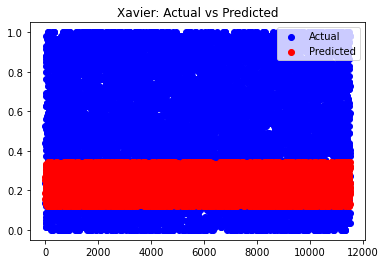

In [162]:
# Predict on the test set
y_test_pred = X_test @ weights

# Plot actual vs predicted
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(np.arange(len(y_test)), y_test_pred, color='red', label='Predicted')
plt.legend()
plt.title('Xavier: Actual vs Predicted')
plt.show()


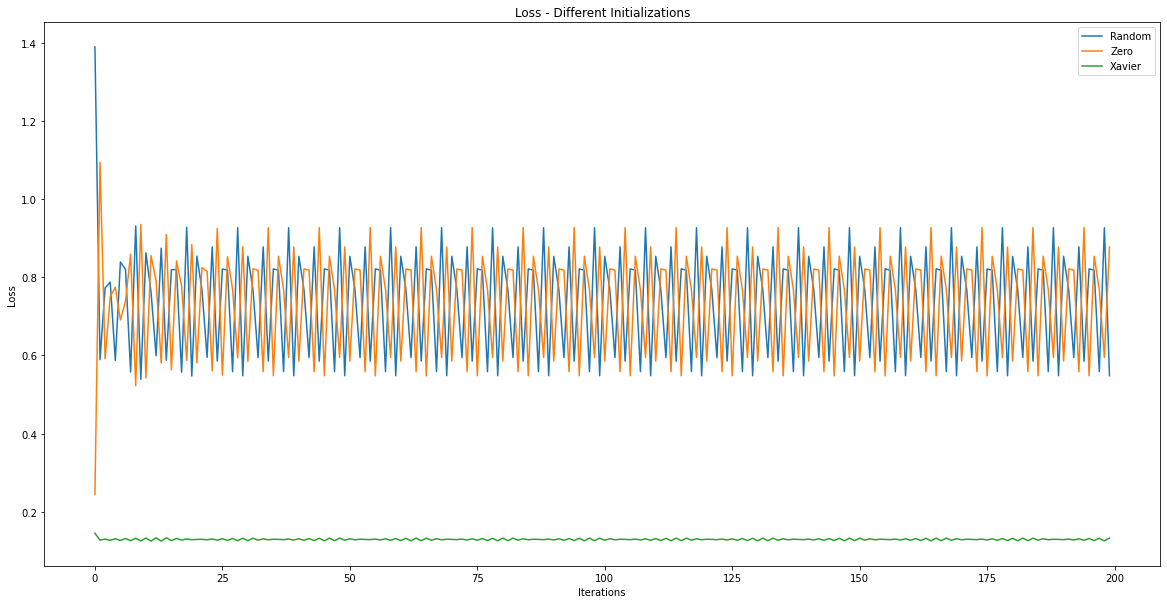

In [163]:
plt.figure(figsize=(20,10)) 
plt.plot(loss_rand[:200], label='Random', markevery=10000)
plt.plot(loss_zero[:200], label='Zero')
plt.plot(loss_xavier[:200], label='Xavier')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss - Different Initializations')
plt.show()


In [164]:
loss_rand[25003]

0.8778102290882852

In [165]:
loss_zero

[0.24419386387867842,
 1.0941368035244659,
 0.5913715336156974,
 0.7501525194566,
 0.7745362836715748,
 0.6908117232172266,
 0.7388303391099715,
 0.8592154992395774,
 0.5225002210814135,
 0.9352771807318114,
 0.5422621138882429,
 0.8554069377567193,
 0.7907377079046064,
 0.5802628751648942,
 0.9094036034485594,
 0.5626485816613872,
 0.8417304851706682,
 0.7776261859879545,
 0.587025139799378,
 0.8835739069542993,
 0.5807497724523167,
 0.8248456763033998,
 0.8153811882068719,
 0.5605682014760744,
 0.925206428076951,
 0.5493917572479255,
 0.8524418391377799,
 0.7691279096450641,
 0.5938605986251835,
 0.8781315824412219,
 0.5849321745021177,
 0.8215389373196719,
 0.8180517280826012,
 0.5584471474928934,
 0.9269131823041031,
 0.5479729762866437,
 0.8535902529924632,
 0.7682177529566183,
 0.5945940919268208,
 0.877548230283159,
 0.5853816108147903,
 0.8211838609561144,
 0.8183386265204042,
 0.5582194355529819,
 0.9270964923067196,
 0.5478207096350638,
 0.8537135350114404,
 0.768120065810856

In [167]:
import pickle
with open('MANOGNA_VANAM_assignment1_part4.pickle', 'wb') as f:
    pickle.dump({'weights': zero_result_weights}, f)

In [ ]:
# Refs:
# https://365datascience.com/tutorials/machine-learning-tutorials/what-is-xavier-initialization/
# https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/markevery_demo.html
# https://stackoverflow.com/questions/34142485/difference-between-numpy-dot-and-python-3-5-matrix-multiplication
# https://medium.com/@yatshunlee/gradient-descent-from-scratch-using-numpy-only-linear-regression-and-quantile-regression-examples-fcb8763d766d